https://www.kaggle.com/code/karnikakapoor/rain-prediction-ann#notebook-container

### 1. 파일 불러오기

In [1]:
import pandas as pd
df= pd.read_csv('Dataset/weatherAUS.csv')

호주 전역의 날씨를 10년동안 관찰했다.

내일 비가 올지를 예측한다.(RainTomorrow)

In [2]:
len(df.columns)

23

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

결측치가 있음

df는 숫자와 카테고리 변수를 포함하고 있다.

### 2. 데이터 시각화와 정제

1) 타켓 특성 비율 확인

2) 숫자 특성 상관관계 확인

3) Date를 datetime으로 변경

4) 일, 월 인코딩

5) 결측치 처리

<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

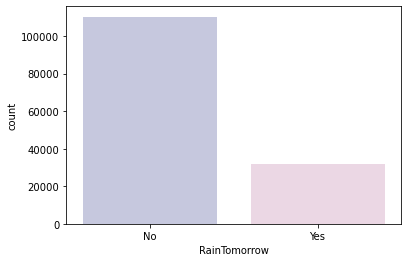

In [4]:
# 1. 타겟 특성 비율 확인하기

import seaborn as sns

colors= ['#C2C4E2', '#EED4E5']
sns.countplot(x= df['RainTomorrow'], palette= colors)

<AxesSubplot:>

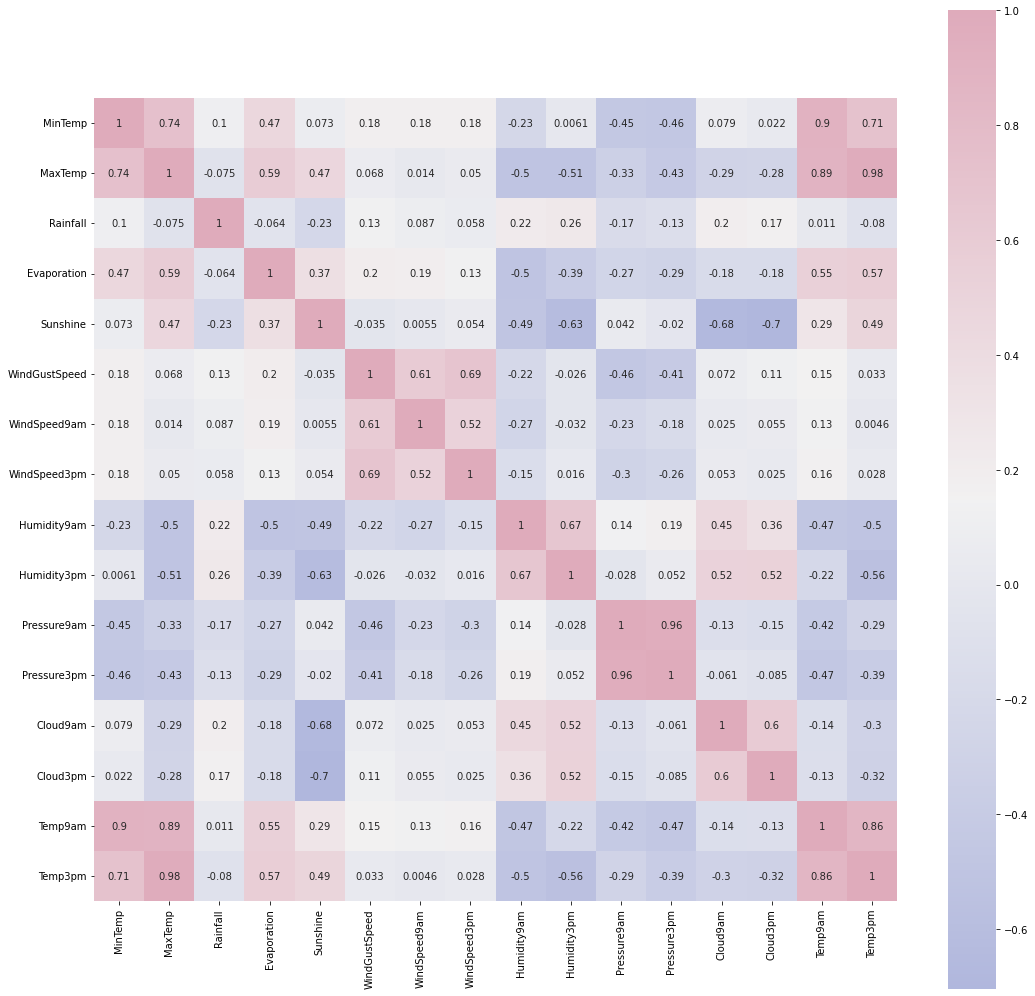

In [5]:
# 2. 숫자 특성 상관관계 확인

import matplotlib.pyplot as plt

corrmat= df.corr()
cmap= sns.diverging_palette(260, -10, s= 50, l= 75, n= 6, as_cmap= True)
plt.subplots(figsize= (18, 18))
sns.heatmap(corrmat, cmap= cmap, annot= True, square= True)

In [6]:
# 3. Date를 datetime으로 바꾸기
# Date 각 행의 문자열 길이 계산
lengths= df['Date'].str.len()
lengths.value_counts()
# 모두 10개인것으로 보아 이상한 값은 없는 것으로 보인다.

10    145460
Name: Date, dtype: int64

In [7]:
# 4. 월 일 인코딩
# datetime으로 변경
df['Date']= pd.to_datetime(df['Date'])

# year 특성을 새로 만든다.
df['year']= df.Date.dt.year

# cyclic 파라미터로 바꾼다.(이게 뭐지?)
# 주기가 있는 것에 주기를 설정하기 위한 것이라는데..
import numpy as np
def encode(df, col, max_val):
    df[col + '_sin']= np.sin(2 * np.pi * df[col]/max_val)
    df[col + '_cos']= np.cos(2 * np.pi * df[col]/max_val)
    return df

df['month']= df.Date.dt.month
df= encode(df, 'month', 12)

df['day']= df.Date.dt.day
df= encode(df, 'day', 31)

Text(0.5, 0, 'Days In year')

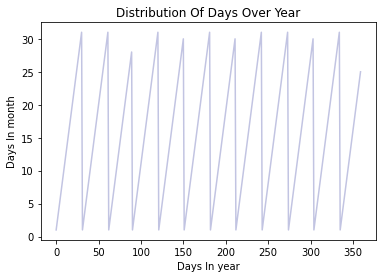

In [8]:
# 연간 일수 분포'
# 이걸 왜 보는 걸까?: 어차피 매일매일 기록된거 아닌였나?
section= df[:360]
tm= section['day'].plot(color= '#C2C4E2')
tm.set_title('Distribution Of Days Over Year')
tm.set_ylabel('Days In month')
tm.set_xlabel('Days In year')

Text(0.5, 0, 'Sine Encoded Months')

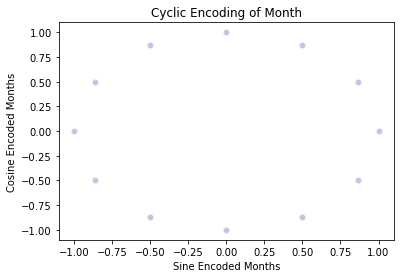

In [9]:
cyclic_month= sns.scatterplot(x= 'month_sin', y= 'month_cos', data= df, color= '#C2C4E2')
cyclic_month.set_title('Cyclic Encoding of Month')
cyclic_month.set_ylabel('Cosine Encoded Months')
cyclic_month.set_xlabel('Sine Encoded Months')

Text(0.5, 0, 'Sine Encoded Day')

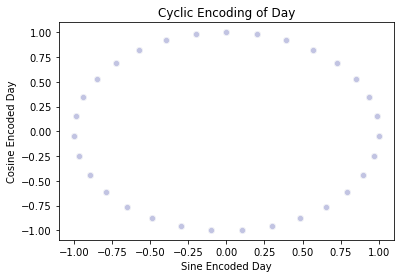

In [10]:
cyclic_day= sns.scatterplot(x= 'day_sin', y= 'day_cos', data= df, color= '#C2C4E2')
cyclic_day.set_title('Cyclic Encoding of Day')
cyclic_day.set_ylabel('Cosine Encoded Day')
cyclic_day.set_xlabel('Sine Encoded Day')

In [18]:
# 5. 카테고리 변수: 결측치 처리
# 카테고리 특성만 저장
s= df.dtypes== 'object'
object_cols= list(s[s].index)

print('Categorical variables')
print(object_cols)

Categorical variables
['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [21]:
# 결측치 몇개인지 확인하기
for i in object_cols:
    print(i, df[i].isnull().sum())

Location 0
WindGustDir 10326
WindDir9am 10566
WindDir3pm 4228
RainToday 3261
RainTomorrow 3267


In [25]:
# 결측리를 최빈값을 채움
for i in object_cols:
    df[i].fillna(df[i].mode()[0], inplace= True)

In [27]:
# 5. 결측치 처리: 숫자 변수
t= (df.dtypes== 'float64')
num_cols= list(t[t].index)

print('Neumeric variables:')
print(num_cols)

Neumeric variables:
['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'month_sin', 'month_cos', 'day_sin', 'day_cos']


In [29]:
# 결측치 몇개 있는지 확인
for i in num_cols:
    print(i, df[i].isnull().sum())

MinTemp 1485
MaxTemp 1261
Rainfall 3261
Evaporation 62790
Sunshine 69835
WindGustSpeed 10263
WindSpeed9am 1767
WindSpeed3pm 3062
Humidity9am 2654
Humidity3pm 4507
Pressure9am 15065
Pressure3pm 15028
Cloud9am 55888
Cloud3pm 59358
Temp9am 1767
Temp3pm 3609
month_sin 0
month_cos 0
day_sin 0
day_cos 0


In [30]:
# 중간값으로 채우기
for i in num_cols:
    df[i].fillna(df[i].median(), inplace= True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 30 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  object        
 2   MinTemp        145460 non-null  float64       
 3   MaxTemp        145460 non-null  float64       
 4   Rainfall       145460 non-null  float64       
 5   Evaporation    145460 non-null  float64       
 6   Sunshine       145460 non-null  float64       
 7   WindGustDir    145460 non-null  object        
 8   WindGustSpeed  145460 non-null  float64       
 9   WindDir9am     145460 non-null  object        
 10  WindDir3pm     145460 non-null  object        
 11  WindSpeed9am   145460 non-null  float64       
 12  WindSpeed3pm   145460 non-null  float64       
 13  Humidity9am    145460 non-null  float64       
 14  Humidity3pm    145460 non-null  float64       
 15  

### 3. 데이터 전처리

1. 카테고리 데이터를 라벨 인코딩 해준다.

2. 특성 스케일링

3. 이상치 확인

4. 데이터 확인 후 이상치 삭제

In [31]:
# 1. 카테고리 데이터를 라벨 인코딩
from sklearn.preprocessing import LabelEncoder
label_encoder= LabelEncoder()
for i in object_cols:
    df[i]= label_encoder.fit_transform(df[i])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 30 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  int32         
 2   MinTemp        145460 non-null  float64       
 3   MaxTemp        145460 non-null  float64       
 4   Rainfall       145460 non-null  float64       
 5   Evaporation    145460 non-null  float64       
 6   Sunshine       145460 non-null  float64       
 7   WindGustDir    145460 non-null  int32         
 8   WindGustSpeed  145460 non-null  float64       
 9   WindDir9am     145460 non-null  int32         
 10  WindDir3pm     145460 non-null  int32         
 11  WindSpeed9am   145460 non-null  float64       
 12  WindSpeed3pm   145460 non-null  float64       
 13  Humidity9am    145460 non-null  float64       
 14  Humidity3pm    145460 non-null  float64       
 15  

In [33]:
# 2. 특성 스케일링
# 스케일할 데이터 선정 및 설정
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

features= df.drop(['RainTomorrow', 'Date', 'day', 'day', 'month'], axis= 1) # target 데이터와 추가한 데이터는 특성에서 제외
target= df['RainTomorrow']

col_names= list(features.columns)
s_scale= preprocessing.StandardScaler()
features= s_scale.fit_transform(features)
features= pd.DataFrame(features, columns= col_names)

features.describe().T

,count,mean,std,min,25%,50%,75%,max
Location,145460.0,-5.633017e-14,1.000003,-1.672228,-0.899139,0.014511,0.857881,1.701250
MinTemp,145460.0,-4.243854e-15,1.000003,-3.250525,-0.705659,-0.030170,0.723865,3.410112
MaxTemp,145460.0,6.513740e-16,1.000003,-3.952405,-0.735852,-0.086898,0.703133,3.510563
Rainfall,145460.0,9.152711e-15,1.000003,-0.275097,-0.275097,-0.275097,-0.203581,43.945571
Evaporation,145460.0,1.352327e-14,1.000003,-1.629472,-0.371139,-0.119472,0.006361,43.985108
Sunshine,145460.0,-4.338304e-15,1.000003,-2.897217,0.076188,0.148710,0.257494,2.360634
WindGustDir,145460.0,1.864381e-14,1.000003,-1.724209,-0.872075,0.193094,1.045228,1.471296
WindGustSpeed,145460.0,-1.167921e-14,1.000003,-2.588407,-0.683048,-0.073333,0.460168,7.243246
WindDir9am,145460.0,-7.433272e-15,1.000003,-1.550000,-0.885669,0.000105,0.885879,1.771653
WindDir3pm,145460.0,1.791486e-15,1.000003,-1.718521,-0.837098,0.044324,0.925747,1.586813


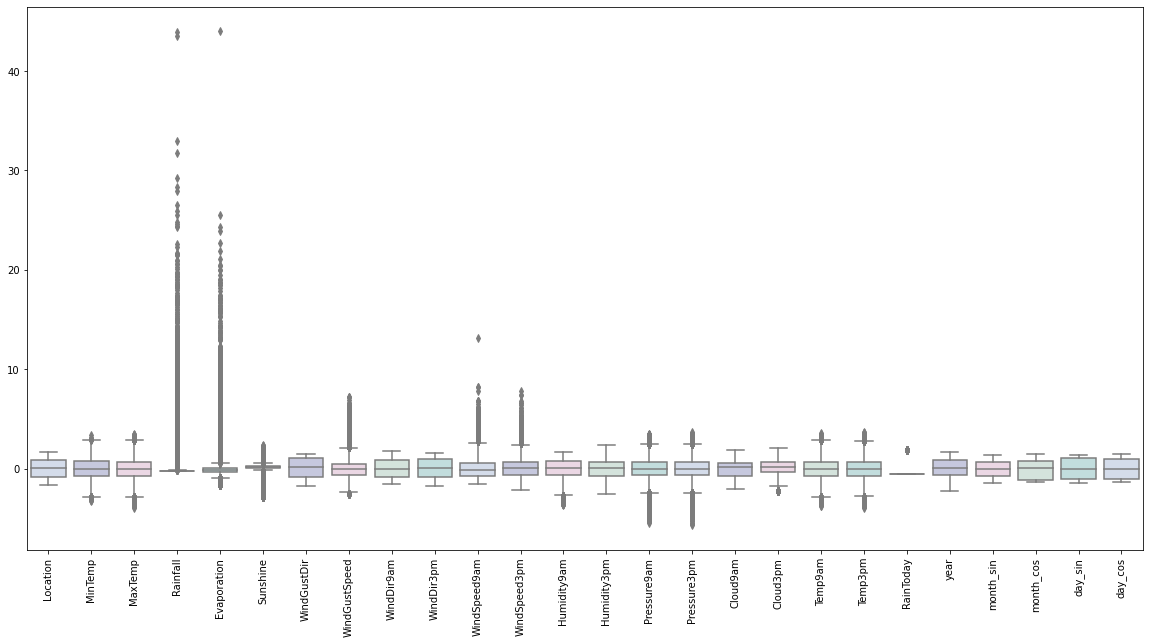

In [35]:
# 3. 이상치 확인
colors= ['#D0DBEE', '#C2C4E2', '#EED4E5', '#D1E6DC', '#BDE2E2']
plt.figure(figsize= (20, 10))
sns.boxplot(data= features, palette= colors)
plt.xticks(rotation= 90)
plt.show()

In [44]:
features['RainTomorrow']= target

features= features[(features['MinTemp']<2.3) & (features['MinTemp']>-2.3)]
features= features[(features['MaxTemp']<2.3) & (features['MaxTemp']>-2)]
features= features[(features['Rainfall']<4.5)]
features= features[(features['Evaporation']<2.8)]
features= features[(features['Sunshine']<2.1)]
features= features[(features['WindGustSpeed']<4) & (features['WindGustSpeed']>-4)]
features= features[(features['WindSpeed9am']<4)]
features= features[(features['WindSpeed3pm']<2.5)]
features= features[(features['Humidity9am']>-3)]
features= features[(features['Humidity3pm']>-2.2)]
features= features[(features['Pressure9am']<2) & (features['Pressure9am']>-2.7)]
features= features[(features['Pressure3pm']<2) & (features['Pressure3pm']>-2.7)]
features= features[(features['Cloud9am']<1.8)]
features= features[(features['Cloud3pm']<2)]
features= features[(features['Temp9am']<2.3) & (features['Temp9am']>-2)]
features= features[(features['Temp3pm']<2.3) & (features['Temp3pm']>-2)]

features.shape

(127536, 27)

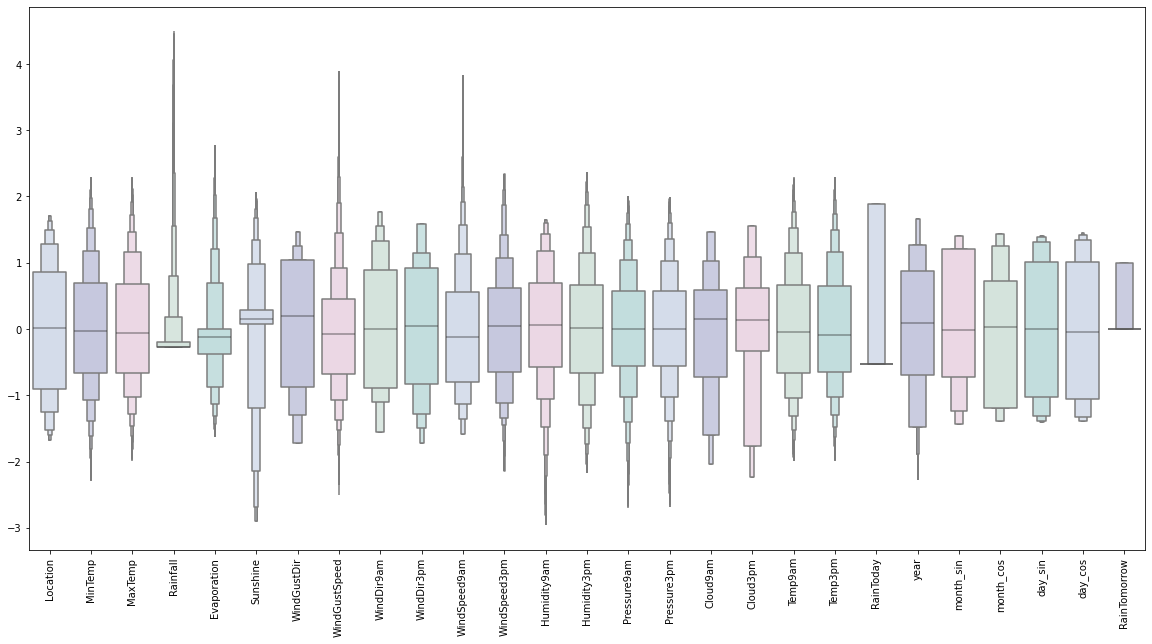

In [46]:
plt.figure(figsize= (20, 10))
sns.boxenplot(data= features, palette= colors)
plt.xticks(rotation= 90)
plt.show()

### 4. 모델 만들기

1. X, y 나누기
2. train, test set 분리
3. 뉴럴 네트워크 초기화
4. 레이어 정의
5. 뉴럴 네트워크 컴파일(학습 시키기 전에 준비 단계)
6. 뉴럴 네트워크 학습

In [47]:
# 1. X, y 나누기
from sklearn.model_selection import train_test_split

X= features.drop(['RainTomorrow'], axis= 1)
y= features['RainTomorrow']

# 2. train, test set 분리
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, random_state= 42)

# 확인
print(X_train.shape, y_train.shape)
print(X_test.shape, y_train.shape)

(102028, 26) (102028,)
(25508, 26) (102028,)


In [ ]:
# Early stopping 
from keras import callbacks
early_stopping= callbacks.EarlyStopping(
    min_delta= 0.001, # 
)